# Dropout: it is basically a technique to drop the nodes from our neural network in every epoch to handel the case of overfitting

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers.legacy import Adam

# 1.Regression problem

In [2]:
x_train = np.linspace(-1, 1, 20)

In [3]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [4]:
x_test = np.linspace(-1, 1, 20)

In [5]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

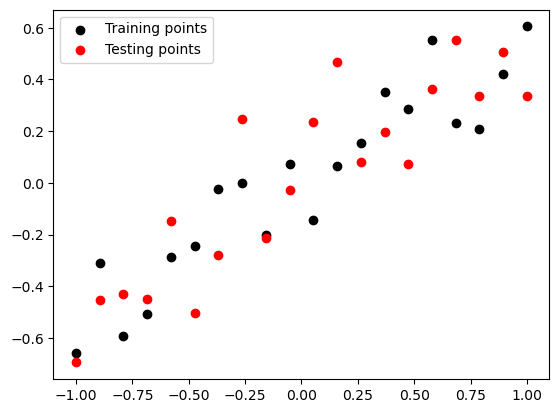

In [6]:
plt.scatter(x_train,y_train,c='black',label="Training points")
plt.scatter(x_test,y_test,c='red',label="Testing points")
plt.legend()
plt.show()


# Regression model architecture

In [7]:
model=Sequential()

In [8]:
model.add(Dense(128,input_dim=1,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(1,activation="linear"))

adam=Adam(learning_rate=0.01)
model.compile(loss="mse",optimizer=adam,metrics=["mse"])
history=model.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test),verbose=False)

In [9]:
# evaluating the model

In [10]:
_,train_mse = model.evaluate(x_train, y_train, verbose=0)
_,test_mse = model.evaluate(x_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.0036612977273762226, Test: 0.04504980891942978


In [11]:
y_pred=model.predict(x_test)

1/1 [==============================] - 0s 26ms/step


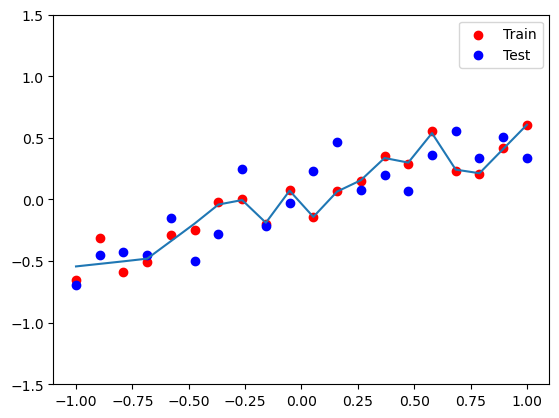

In [12]:
# Here we can clearly see it is the case of overfit as our model is trying to touch every point on training data and ignoring testing data
plt.figure()
plt.scatter(x_train, y_train, c='red', label='Train')
plt.scatter(x_test, y_test, c='blue', label='Test')
plt.plot(x_test, y_pred)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

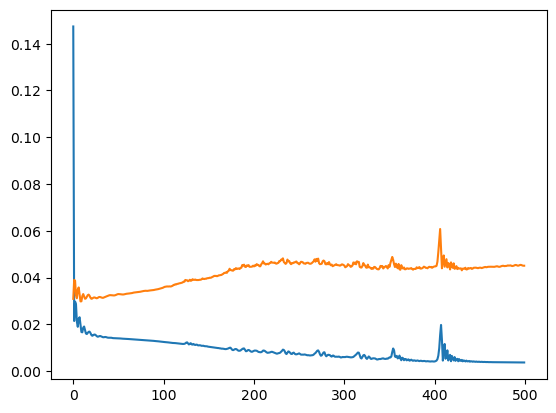

In [13]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

# Dropout model

In [19]:
model=Sequential()
model.add(Dense(128,input_dim=1,activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(128,activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(1,activation="linear"))

adam=Adam(learning_rate=0.01)
model.compile(loss="mse",optimizer=adam,metrics=["mse"])
history=model.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test),verbose=False)

In [20]:
_,train_mse = model.evaluate(x_train, y_train, verbose=0)
_,test_mse = model.evaluate(x_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.01767461560666561, Test: 0.03795196861028671


In [21]:
y_pred=model.predict(x_test)

1/1 [==============================] - 0s 28ms/step


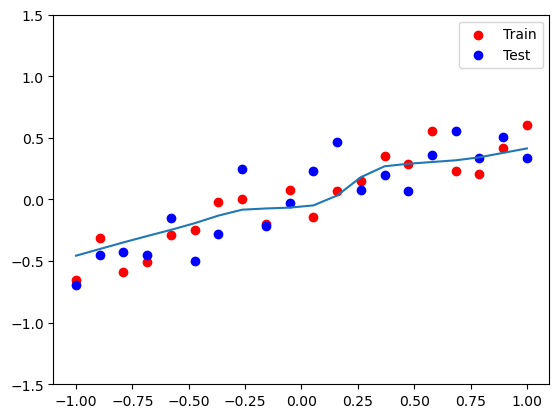

In [22]:
plt.figure()
plt.scatter(x_train, y_train, c='red', label='Train')
plt.scatter(x_test, y_test, c='blue', label='Test')
plt.plot(x_test, y_pred)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

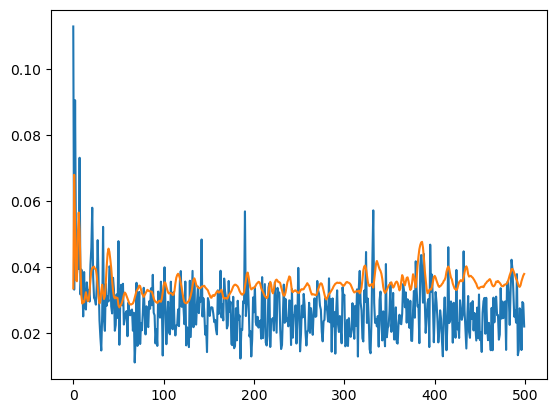

In [23]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])